
# 1. Importing necessary libraries


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')


# 2. Preparing the data

In [2]:
df_review = pd.read_csv("movie.csv")
df_review

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1


In [3]:
len(df_review[df_review['label'] == 0])

20019

In [4]:
df_positive = df_review[df_review['label']==1][:5000]
df_negative = df_review[df_review['label']==0][:5000]

df_review_imb = pd.concat([df_positive,df_negative ])

In [5]:
#df_review_imb = df_review

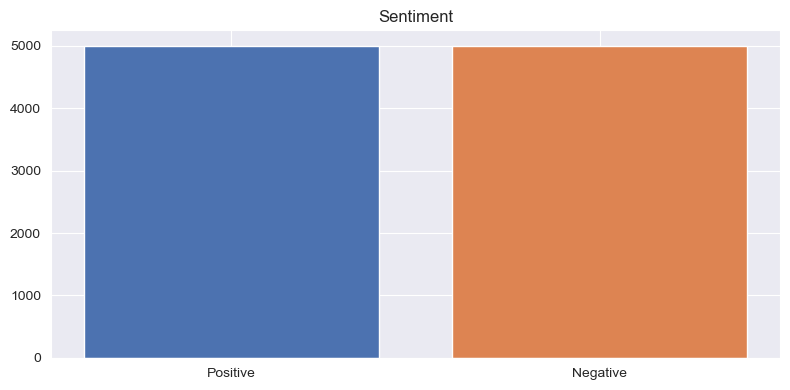

In [6]:
colors = sns.color_palette('deep')

plt.figure(figsize=(8,4), tight_layout=True)
plt.bar(x=['Positive', 'Negative'],
        height=df_review_imb.value_counts(['label']),
        color=colors[:2])
plt.title('Sentiment')
plt.savefig('sentiment.png')
plt.show()

To resample our data we use the imblearn library. You can either undersample positive reviews or oversample negative reviews (you need to choose based on the data you’re working with). In this case, we’ll use the RandomUnderSampler

In [7]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state= 0)
df_review_bal,df_review_bal['label']=rus.fit_resample(df_review_imb[['text']],df_review_imb['label'])


df_review_bal

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,A terrible movie as everyone has said. What ma...,0
...,...,...
9995,"Embarrassingly, I just watched this movie for ...",1
9996,i am surprised so few have good words for this...,1
9997,"Halfway through Lajos Koltai's ""Evening,"" a wo...",1
9998,Felix Unger (Jack Lemmon) has just been dumped...,1


We can compare the imbalanced and balanced dataset with the following code.

In [8]:
print(df_review_imb.value_counts('label'))
print(df_review_bal.value_counts('label'))

label
0    5000
1    5000
dtype: int64
label
0    5000
1    5000
dtype: int64



## Splitting data into train and test set


In [9]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(df_review_bal,test_size =0.33,random_state=42)

In [10]:
train_x, train_y = train['text'], train['label']
test_x, test_y = test['text'], test['label']

In [11]:
train_y.value_counts()

1    3378
0    3322
Name: label, dtype: int64


# 3.Text Representation (Bag of words)


Classifiers and learning algorithms expect numerical feature vectors rather than raw text documents. This is why we need to turn our movie review text into numerical vectors.

we’ll use bag of words (BOW) since we care about the frequency of the words in text reviews; however, the order of words is irrelevant. Two common ways to represent bag of words are CountVectorizer and Term Frequency, Inverse Document Frequency (TF-IDF)

we want to identify unique/representative words for positive reviews and negative reviews, so we’ll choose the TF-IDF. To turn text data into numerical vectors with TF-IDF

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
train_x_vector = tfidf.fit_transform(train_x)
# also fit the test_x_vector
test_x_vector = tfidf.transform(test_x)


Finally, let's also transform the test_x_vector, so we can test the accuracy of the model later 

In [13]:
pd.DataFrame.sparse.from_spmatrix(train_x_vector,
                                  index=train_x.index,
                                  columns=tfidf.get_feature_names_out())

,00,000,00000000000,007,00pm,00s,01,0148,02,03,...,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz,æon,émigrés,état,évery,êxtase,óli,úber,über
8371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6862,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 4.Model Selection

In our example, our input (review) and output (sentiment) are clearly identified, so we can say we have labeled input and output data; therefore, we’re dealing with supervised learning.

We will benchmark the four classification models.



##  Support Vector Machine(SVM)


In [14]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(train_x_vector, train_y)

SVC(kernel='linear')

In [15]:
print(svc.predict(tfidf.transform(['A good movie'])))
print(svc.predict(tfidf.transform(['An excellent movie'])))
print(svc.predict(tfidf.transform(['I did not like this movie at all I gave this movie away'])))

[1]
[1]
[0]



## Decision Tree


In [15]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()
dec_tree.fit(train_x_vector, train_y)

DecisionTreeClassifier()


## Naive Bayes


In [16]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_x_vector.toarray(), train_y)

GaussianNB()


## Logistic Regression


In [17]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(train_x_vector,train_y)

LogisticRegression()

>Note: Here notice that we are using review dataframe in vectorized form and sentiment dataframe in normal form it is so that model evaluates the vectorized values of review dataframe and gives out output in normal english not in a vectorized form so that it can be readable to us


# 5. Model Evaluation


## Mean Accuracy

In [18]:
print(svc.score(test_x_vector, test_y))
print(dec_tree.score(test_x_vector, test_y))
print(gnb.score(test_x_vector.toarray(), test_y))
print(log_reg.score(test_x_vector, test_y))

0.8712121212121212
0.7078787878787879
0.6436363636363637
0.8812121212121212


SVM and Logistic Regression perform better than the other two classifiers, with SVM having a slight advantage (84% of accuracy).Thus,we’ll focus only on SVM.

## F1 Score

F1 Score is the weighted average of Precision and Recall. Accuracy is used when the True Positives and True negatives are more important while F1-score is used when the False Negatives and False Positives are crucial. Also, F1 takes into account how the data is distributed, so it’s useful when you have data with imbalance classes.

In [19]:
from sklearn.metrics import f1_score

f1_score(test_y,svc.predict(test_x_vector),
          labels = [1,0],average=None)

array([0.87225729, 0.87014971])

## Classification report

In [20]:
from sklearn.metrics import classification_report

print(classification_report(test_y,
                            svc.predict(test_x_vector),
                            labels = [1,0]))

              precision    recall  f1-score   support

           1       0.85      0.89      0.87      1622
           0       0.89      0.85      0.87      1678

    accuracy                           0.87      3300
   macro avg       0.87      0.87      0.87      3300
weighted avg       0.87      0.87      0.87      3300



## Confusion Matrix

A confusion matrix is a table that allows visualization of the performance of an algorithm. This table typically has two rows and two columns that report the number of false positives, false negatives, true positives, and true negatives

In [21]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(test_y,
                           svc.predict(test_x_vector),
                           labels = [1, 0])
conf_mat

array([[1451,  171],
       [ 254, 1424]], dtype=int64)


# 6. Tuning the Model


## GridSearchCV

This is technique consists of an exhaustive search on specified parameters in order to obtain the optimum values of hyperparameters.

In [23]:
from sklearn.model_selection import GridSearchCV
#set the parameters
params = {'C': [1,4,8,16,32], 'kernel' : ['linear','rbf']}
svc_in_gridCV = SVC()
svc_grid = GridSearchCV(svc_in_gridCV,params, cv = 5)
svc_grid.fit(train_x_vector, train_y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 4, 8, 16, 32], 'kernel': ['linear', 'rbf']})

In [24]:
print(svc_grid.best_params_)
print(svc_grid.best_estimator_)

{'C': 4, 'kernel': 'rbf'}
SVC(C=4)


So Above obtained paramters and kernel are the best for our model to obtain desired results as accurate as possible

In [25]:
svc_grid.score(test_x_vector, test_y)

0.88

In [22]:
import webScraper

In [23]:
imdb_url = "https://www.imdb.com/title/tt0460649/reviews"

comments = webScraper.scrape_for_comments(imdb_url)


Loading comments: 994/994 [==================================================]
All comments 994

find specific 0.008219600029406138
, find all next 0.12663659998361254
, extract text 0.09349900003144285
, find review count 0.047745199997734744
, init soups 1.2152642000000924
, load page source 32.14287379999587
Total time: 33.80176869999559


In [25]:
np_array = np.asarray(list(comments))
comment_vector = tfidf.transform(np_array)

In [59]:

comments_pred = svc_grid.predict(comment_vector)

In [65]:
for i in range(len(np_array)):
    print(comments_pred[i], "\t\t", np_array[i])

1 		 I am one of the people who was not happy about the ending but I will not give a very bad rating just because of one single episode. It was a great show. I see people complaining how it is unrealistic and why Ted tells about the mother to the kids so long...What have those people been smoking? It isn't a documentary, it is a sitcom. Sure they talk about real life issues one can connect to, but they make it in unrealistic ways that makes it fun. For example, there sure are players out their, but no they don't have love affairs with their suits, have a playbook or do most of the things Barney ever did. And there are dads who tell their kids how they met the mother but they don't do it for 9 years rambling on about all the sex him and his friends had.I love the show. It had always brought originality and very surprising twists. There were episodes where I was really not expecting how it turned out. And this is usually not the case, especially not on sitcoms. We had some running jokes 

In [67]:
len(comments_pred[comments_pred == 0]), len(comments_pred[comments_pred == 1])

(220, 774)

In [26]:
svc_comments_pred = svc.predict(comment_vector)

In [28]:
coefficients = svc.coef_


In [30]:

feature_names = tfidf.get_feature_names_out()

# Assuming you have coefficients from a logistic regression model
feature_coefficients = dict(zip(feature_names, coefficients[0]))

In [36]:
print(feature_coefficients.values())

dict_values([<1x43730 sparse matrix of type '<class 'numpy.float64'>'
	with 37761 stored elements in Compressed Sparse Row format>])
